<a href="https://colab.research.google.com/github/prikshit-2000/Sarcasm-classification-/blob/master/Sarcasm_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

In [54]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json


--2020-09-23 15:21:03--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.31.128, 173.194.210.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2020-09-23 15:21:03 (167 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [55]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [56]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_size = 20000

In [57]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [58]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [59]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [60]:
model=tf.keras.Sequential([
                           tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length = max_length),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(32,activation = 'relu'),
                           tf.keras.layers.Dense(1,activation = 'sigmoid')
])


In [63]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 24)                408       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [64]:
num_epochs = 40
history = model.fit(training_padded,training_labels,epochs=num_epochs,validation_data=(testing_padded,testing_labels),verbose=2)


Epoch 1/40
625/625 - 3s - loss: 0.1190 - accuracy: 0.9566 - val_loss: 0.4415 - val_accuracy: 0.8495
Epoch 2/40
625/625 - 2s - loss: 0.1089 - accuracy: 0.9620 - val_loss: 0.4727 - val_accuracy: 0.8450
Epoch 3/40
625/625 - 2s - loss: 0.0998 - accuracy: 0.9645 - val_loss: 0.5043 - val_accuracy: 0.8399
Epoch 4/40
625/625 - 2s - loss: 0.0913 - accuracy: 0.9689 - val_loss: 0.5582 - val_accuracy: 0.8302
Epoch 5/40
625/625 - 2s - loss: 0.0857 - accuracy: 0.9704 - val_loss: 0.5550 - val_accuracy: 0.8380
Epoch 6/40
625/625 - 2s - loss: 0.0758 - accuracy: 0.9758 - val_loss: 0.5957 - val_accuracy: 0.8323
Epoch 7/40
625/625 - 2s - loss: 0.0704 - accuracy: 0.9775 - val_loss: 0.6124 - val_accuracy: 0.8334
Epoch 8/40
625/625 - 3s - loss: 0.0674 - accuracy: 0.9778 - val_loss: 0.6408 - val_accuracy: 0.8298
Epoch 9/40
625/625 - 2s - loss: 0.0600 - accuracy: 0.9815 - val_loss: 0.7232 - val_accuracy: 0.8241
Epoch 10/40
625/625 - 2s - loss: 0.0566 - accuracy: 0.9815 - val_loss: 0.7076 - val_accuracy: 0.8258

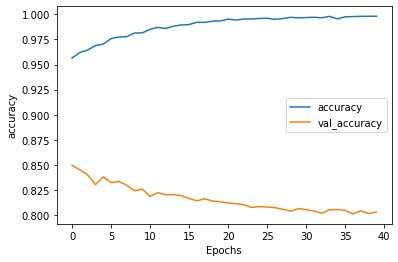

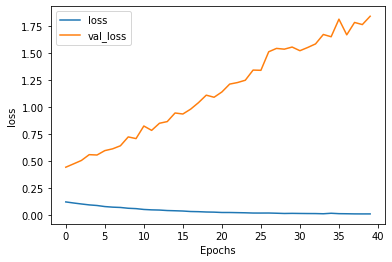

In [65]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [75]:

sentence = testing_sentences
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
pred=model.predict(padded)
for i,sentences in enumerate(testing_sentences):
  print(sentences)
  print(np.where(pred[i]>=0.5,1,0))
  

Streaming output truncated to the last 5000 lines.
[0]
aquarium unveils 'floating carcasses of the pacific' exhibit
[1]
early humans finally drunk enough to invent dancing
[1]
colorado's new revenge porn statute is good law and sound policy
[0]
i donated my eggs so i could travel the world
[0]
we must ensure democratic integrity in the digital age
[0]
microlender forecloses on goat
[1]
these parents' classified ad may raise a few eyebrows
[1]
north korea demolishes tunnels at nuclear test site, reports say
[1]
the solution to all of your budgeting problems
[0]
noisy upstairs neighbors wake man at 3 p.m.
[1]
a gay take on a pop classic becomes a rallying cry for orlando
[0]
interfaith efforts work for reconciliation in the central african republic
[0]
'stormy daniels day' declared in west hollywood as adult star gets key to city
[1]
boss' dick not going to suck itself
[1]
trump's prefrontal cortex admits it can't possibly filter all impulsive comments coming from rest of brain
[1]
forme